Data Loading & Preprocessing

In [22]:
def load_and_preprocess_data(path):
    df = pd.read_csv('../data/Churn_Modelling.csv')
    df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

    # Encode categorical variables
    df['Gender'] = LabelEncoder().fit_transform(df['Gender'])  # Male=1, Female=0
    df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

    X = df.drop('Exited', axis=1)
    y = df['Exited']

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return train_test_split(X_scaled, y, test_size=0.2, random_state=42), X.columns

Model Training & Evaluation

In [25]:
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    report = classification_report(y_test, y_pred)

    print(f"🔍 Model: {model.__class__.__name__}")
    print(f"✅ Accuracy: {accuracy:.4f}")
    print(f"📈 ROC AUC: {roc_auc:.4f}")
    print("📋 Classification Report:")
    print(report)
    print("="*50)

Feature Importance (for tree models)

In [28]:
def plot_feature_importance(model, feature_names):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)
        plt.figure(figsize=(10, 6))
        plt.barh(range(len(indices)), importances[indices], align='center')
        plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
        plt.xlabel("Feature Importance")
        plt.title(f"Feature Importance - {model.__class__.__name__}")
        plt.show()

In [30]:
(X_train, X_test, y_train, y_test), feature_names = load_and_preprocess_data("Churn_Modelling.csv")

 Train models and save trained models in a list

In [33]:
models = [
    LogisticRegression(max_iter=1000, random_state=42).fit(X_train, y_train),
    RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train, y_train),
    GradientBoostingClassifier(random_state=42).fit(X_train, y_train),
    XGBClassifier(eval_metric='logloss', random_state=42, n_jobs=-1).fit(X_train, y_train)
]

Train and evaluate all models

In [36]:
for model in models:
    train_and_evaluate_model(model, X_train, X_test, y_train, y_test)

🔍 Model: LogisticRegression
✅ Accuracy: 0.8110
📈 ROC AUC: 0.7789
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

🔍 Model: RandomForestClassifier
✅ Accuracy: 0.8660
📈 ROC AUC: 0.8576
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

🔍 Model: GradientBoostingClassifier
✅ Accuracy: 0.8675
📈 ROC AUC: 0.8729
📋 Classification Report:
              precision    recall  f1-score   support

         

Plot feature importance for GradientBoostingClassifier

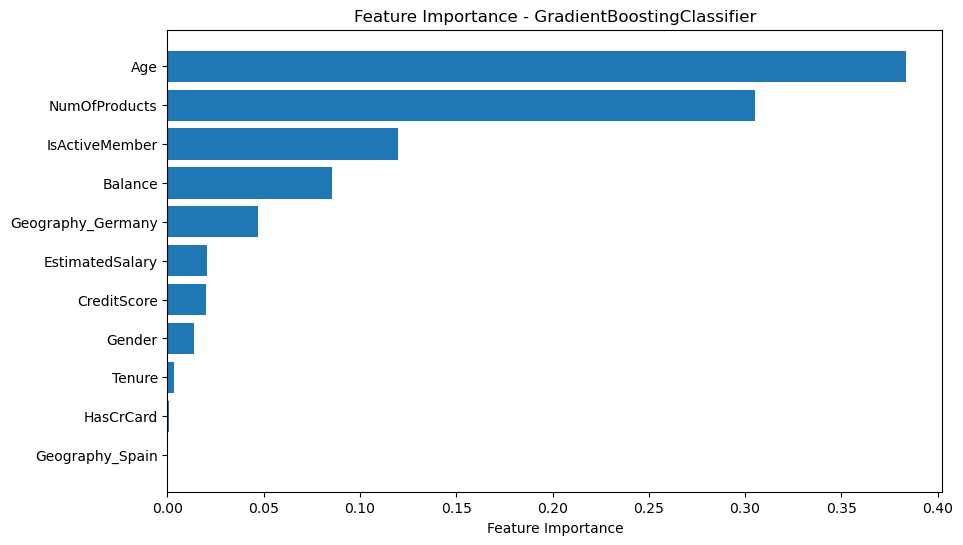

In [39]:
gb_model = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)
plot_feature_importance(gb_model, feature_names)


Save all models to a single file with compression

In [42]:
joblib.dump(models, '../models/all_models_churn.pkl', compress=3)
print("All models saved to 'models/all_models_churn.pkl'")

All models saved to 'models/all_models_churn.pkl'
